<a href="https://colab.research.google.com/github/DivyaSadhana/PV-Supervised-ML/blob/main/Supervised_Machine_Learning_for_Pharmacovigilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Establish connection between My Drive and Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Import Excel sheet from My Drive

import pandas as pd

In [4]:
df = pd.read_excel(r'/content/gdrive/My Drive/Tracker.xlsx')
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,NaN,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1


In [5]:
#Fill missing/NaN values of Death data as 'No' since patients who were died had already been categorised as 'Yes' in the data source.
# Classify the data into 'Yes' and 'No' category only.

df["DIED"].fillna('No', inplace=True)
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,25.1,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,NaN,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1


In [6]:
#Fill missing/NaN values with 'Zero' by creating new calculated column 'Number_days_for_Event_Onset'.
# This column created based on difference in number of days between 'Vaccine Administered Date' and 'Adverse Event Onset date'.
#Ensure datatype for this new column as integer.

Number_of_Days_for_Event_Onset = df['NUMDAYS'].fillna(0).astype(int)
print(Number_of_Days_for_Event_Onset)
print(Number_of_Days_for_Event_Onset.dtypes)

0        0
1        0
2        0
3        0
4        0
        ..
3559     0
3560    94
3561    94
3562    94
3563     0
Name: NUMDAYS, Length: 3564, dtype: int64
int64


In [7]:
#Add this newly created column to the dataframe

df['Number_of_Days_for_Event_Onset'] = Number_of_Days_for_Event_Onset
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0
2,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,COVID19,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test positiveUnresponsive to stimul...,3,0
3,2547731,2023-01-01,MA,6.0,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,No,...,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Product preparation issue,1,0
4,2547732,2023-01-01,MA,38.0,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,No,...,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),Injury associated with device,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,2552102,2023-01-06,NaN,NaN,NaN,NaN,U,NaN,HEART RATE WENT UP TO 186; GOT COVID; This spo...,No,...,COVID19,JANSSEN,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),COVID-19Heart rateHeart rate increased,3,0
3560,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),AtelectasisCOVID-19Chest X-rayComa scaleComput...,5,94
3561,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),Diastolic dysfunctionEchocardiogramEjection fr...,5,94
3562,2552103,2023-01-06,NaN,65.0,NaN,NaN,F,NaN,Cryptococcal meningitis; embolic showers/throm...,No,...,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA)),MicroembolismPolymerase chain reactionSARS-CoV...,5,94


In [8]:
#Fill missing/NaN values with 'Zero' by creating new calculated column by ensuring new column datatype as integer.

AGE = df['AGE_YRS'].fillna(0).astype(int)
print(AGE)

0       53
1       53
2       53
3        6
4       38
        ..
3559     0
3560    65
3561    65
3562    65
3563     0
Name: AGE_YRS, Length: 3564, dtype: int64


In [9]:
#Add this newly created column to the dataframe

df['AGE']= AGE
df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset,AGE
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0,53
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,JANSSEN,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0,53


In [10]:
#Fill missing/NaN values with 'Zero' by creating new calculated column
#Ensure datatype for this new column as integer

Vaccine_Dose = df['VAX_DOSE_SERIES'].fillna(0).astype(int)
Vaccine_Dose

0       0
1       0
2       0
3       3
4       4
       ..
3559    1
3560    2
3561    2
3562    2
3563    2
Name: VAX_DOSE_SERIES, Length: 3564, dtype: int64

In [11]:
#Add this newly created column to the dataframe

df['Vaccine_Dose'] = Vaccine_Dose
df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ADVERSE_EVENT,Number_of_Adverse_Events,Number_of_Days_for_Event_Onset,AGE,Vaccine_Dose
0,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Blood pressure orthostatic abnormalCOVID-19Com...,5,0,53,0
1,2547730,2023-01-01,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,No,...,1808982,0,SYR,AR,COVID19 (COVID19 (JANSSEN)),Head injuryHeadacheLaboratory testMagnetic res...,5,0,53,0


<ipython-input-76-80611eb2bc51>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df.VAX_MANU, rotation=90)


Janssen manifactured vaccines contributed more number of hospitalizations


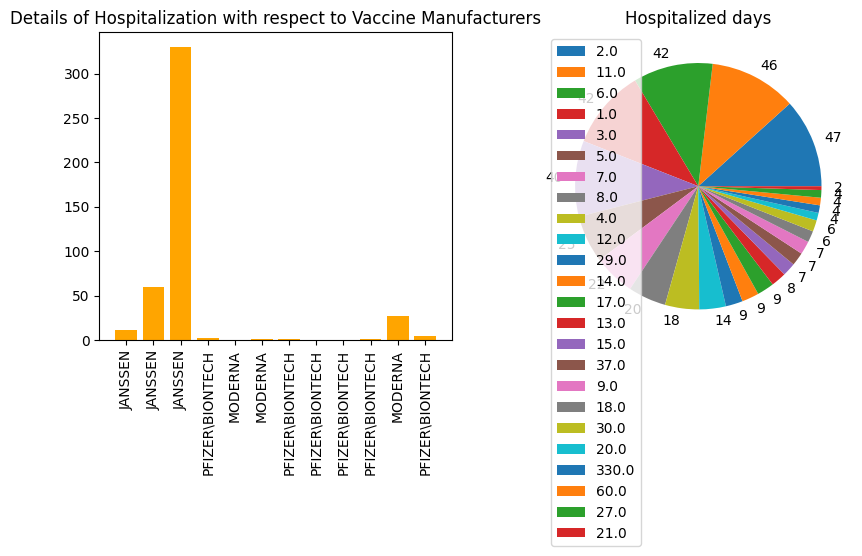

In [76]:
# Create a figure for 2 subplots to display which vaccine manufacturer contributed for highest number of hospitalizations
fig, ax = plt.subplots(1, 2,  figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df.VAX_MANU, height=df.HOSPDAYS, color='orange')
ax[0].set_title('Details of Hospitalization with respect to Vaccine Manufacturers')
ax[0].set_xticklabels(df.VAX_MANU, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df['HOSPDAYS'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Hospitalized days')
ax[1].legend(pass_counts.keys().tolist())
# Show the figure
fig.show()


In [79]:
print ('Above results shows that Janssen (Johnson & Johnson) manifactured vaccines contributed more number of hospitalizations in the dataset')

Above results shows that Janssen (Johnson & Johnson) manifactured vaccines contributed more number of hospitalizations in the dataset


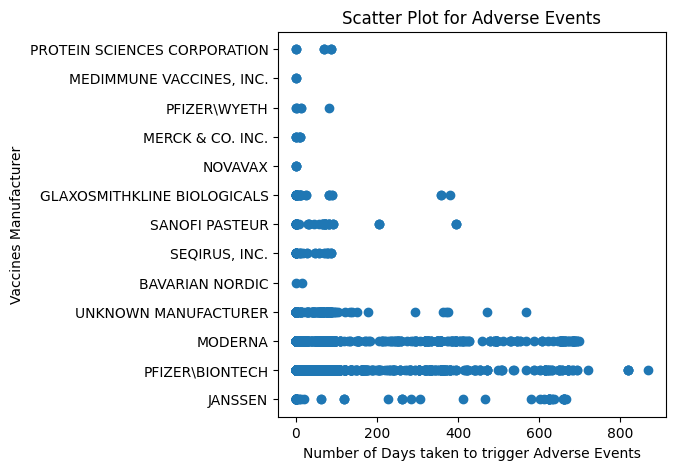

In [86]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot for Adverse Events')
plt.scatter(x=df.Number_of_Days_for_Event_Onset,y=df.VAX_MANU)
plt.xlabel('Number of Days taken to trigger Adverse Events')
plt.ylabel('Vaccines Manufacturer')
plt.show()



In [12]:
#Now create new dataframe by including columns (7 out of 59) which are actually needed for machine learning by excluding rest of the columns
#The ignored/removed columns (52 out of 59) are unwanted for final assessment

Required_Data = df[['AGE','SEX','DIED','VAX_NAME','VAX_MANU','Vaccine_Dose','Number_of_Days_for_Event_Onset']]
Required_Data.head(5)

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
2,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
3,6,M,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,3,0
4,38,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,4,0


In [73]:
# Causality has been estimated by considering adverse events occured in the patients who experienced events within 30days of vaccines shot
#Hence remove all the rows in dataframe where 'Number days for Event Onset' is less than 30

Required_Data = Required_Data[Required_Data.Number_of_Days_for_Event_Onset <= 30]
Required_Data.head(2)

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset,Is_Female,Death
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1,0


In [ ]:
# Out of 3564 rows in initial data source, total of 2275 rows were qualified for final assessment.
# It means among 3564 patients, total of 2275 patients experienced side effects/events within 30days of their vaccine shot.

In [ ]:
#Let's segregate the columns of the data frame into features and labels.
# In this ML Model, 'Death' has been classified as label since we wanted to know chances of death -
#-depending on variables of 'Age, Gender, Vaccine Dose of any particular vaccine'. So rest of the 6 columns were chosen as features.

In [14]:
features = ['AGE','SEX', 'VAX_NAME', 'Number_of_Days_for_Event_Onset','Vaccine_Dose']
label = 'DIED'

X, y = Required_Data[features].values,Required_Data[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 2 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 3 
  Features: [53, 'F', 'COVID19 (COVID19 (JANSSEN))', 0, 0] 
  Label: No
Patient 4 
  Features: [6, 'M', 'COVID19 (COVID19 (PFIZER-BIONTECH))', 0, 3] 
  Label: No
Patient 5 
  Features: [38, 'F', 'COVID19 (COVID19 (MODERNA BIVALENT))', 0, 4] 
  Label: No


In [ ]:
# Display Features Vs Label visualization using boxplot

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

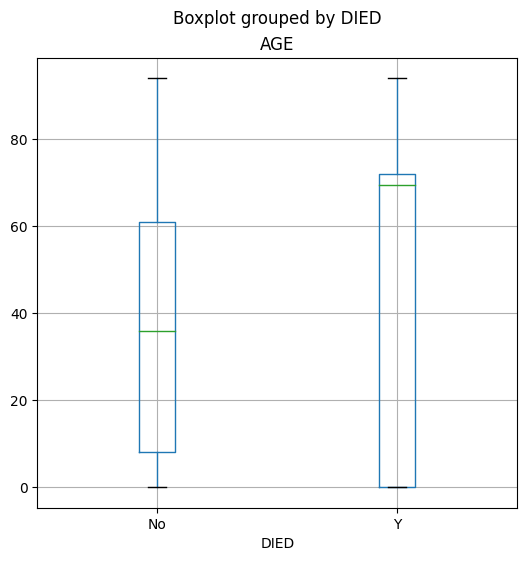

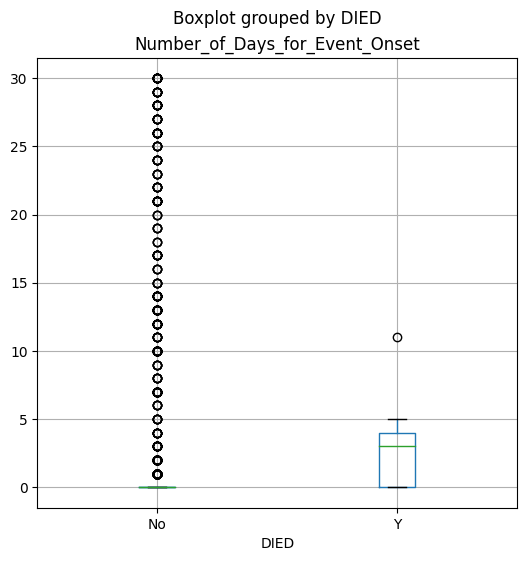

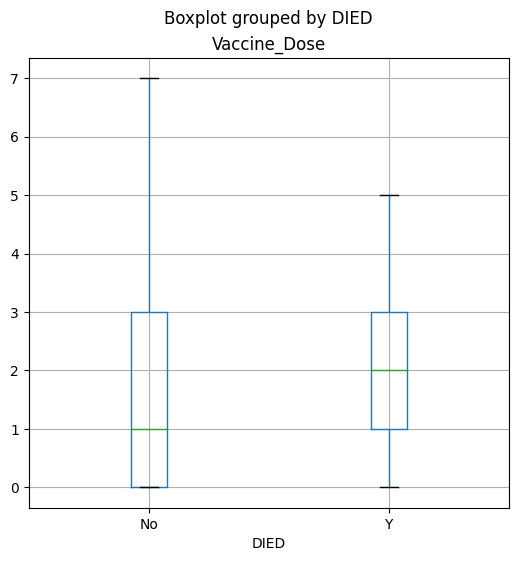

In [ ]:
features = ['AGE','Number_of_Days_for_Event_Onset','Vaccine_Dose']

# We cannot include Sex, Vaccine Name columns for box plot as the data is avaiable in string/object format
for col in features:
    Required_Data.boxplot(column=col, by='DIED',figsize=(6,6))
    plt.title(col)
    plt.show()

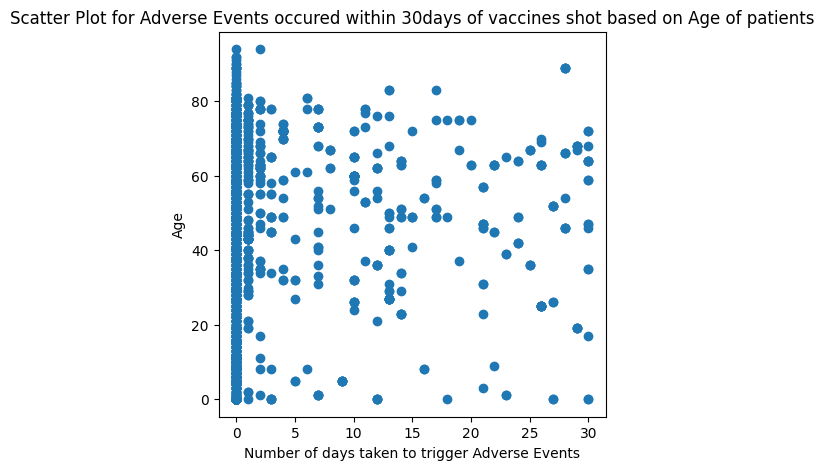

In [16]:
#Create Scatter Plot for Age Vs Number of days taken to trigger Adverse Events
plt.figure(figsize=(5,5))
plt.title('Scatter Plot for Adverse Events occured within 30days of vaccines shot based on Age of patients')
plt.scatter(x=Required_Data.Number_of_Days_for_Event_Onset,y=Required_Data.AGE)
plt.xlabel('Number of days taken to trigger Adverse Events')
plt.ylabel('Age')
plt.show()

In [17]:
#Remove the rows in dataframe where 'SEX' has been included as 'Unknown' since we are building model on gender specific details.
#index selects the index of rows which passes the condition.
#inplace=True performs the drop operation in the same dataframe rather than creating a new one.

Required_Data.drop(Required_Data[(Required_Data['SEX'] == "U")].index, inplace=True)
Required_Data

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
2,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0
3,6,M,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,3,0
4,38,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,4,0
...,...,...,...,...,...,...,...
3548,6,F,No,COVID19 (COVID19 (PFIZER-BIONTECH)),PFIZER\BIONTECH,2,0
3555,54,F,No,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)),PFIZER\BIONTECH,3,7
3556,54,F,No,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)),PFIZER\BIONTECH,3,7
3558,0,F,No,COVID19 (COVID19 (MODERNA BIVALENT)),MODERNA,0,0


In [18]:
# Classify 'Sex' column data into 0 and 1 in which 0 = Male, 1 = Female. Modify gender data from string format to integer.

import numpy as np
Required_Data['Is_Female'] = np.where(Required_Data['SEX'] == 'F', 1, 0)
Required_Data.head(2)

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset,Is_Female
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1


In [19]:
#Create new column 'Death' representing integer for which 'Y'=1 and 'No'=0
import numpy as np
Required_Data['Death'] = np.where(Required_Data['DIED'] == 'No', 0, 1)
Required_Data.head(2)

,AGE,SEX,DIED,VAX_NAME,VAX_MANU,Vaccine_Dose,Number_of_Days_for_Event_Onset,Is_Female,Death
0,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1,0
1,53,F,No,COVID19 (COVID19 (JANSSEN)),JANSSEN,0,0,1,0


In [ ]:
#Remove the duplicate column "IsFemale" in dataframe. It was created as duplicate to 'SEX' while trying to convert data format into integer from string.
#axis should be used if columns should be removed in dataframe.

Required_Data.drop(["IsFemale"], axis=1)

In [ ]:
# Out of 3563 rows 1735 rows have specific genedr details and 'Number of Adverse events onset' is <30.
# It means among 3563 patients, 1753 have been classified as Male/Female and experienced adverse events within 30days of vaccine shot.

In [22]:
#Include newly created column 'Is_Female' under features by replacing 'Sex'.

features = ['AGE','Is_Female', 'Number_of_Days_for_Event_Onset','Vaccine_Dose']
label = 'Death'

X, y = Required_Data[features].values,Required_Data[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [53, 1, 0, 0] 
  Label: 0
Patient 2 
  Features: [53, 1, 0, 0] 
  Label: 0
Patient 3 
  Features: [53, 1, 0, 0] 
  Label: 0
Patient 4 
  Features: [6, 0, 0, 3] 
  Label: 0
Patient 5 
  Features: [38, 1, 0, 4] 
  Label: 0


In [23]:
#Split data into 70:30

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0],X_test.shape[0]))

Training cases: 1214
Test cases: 521


In [ ]:
# How to 'Train' and 'Evaluate' a multiclass classifier - Binary Classification model:-

In [24]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [25]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9731285988483686


In [27]:
# Derive precision, recall, F1-score, support values for the model we developed

In [28]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       507
           1       0.00      0.00      0.00        14

    accuracy                           0.97       521
   macro avg       0.49      0.50      0.49       521
weighted avg       0.95      0.97      0.96       521



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Precision: Of the predictions the model made for this class, what proportion were correct?
#Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?
#F1-Score: An average metric that takes both precision and recall into account.
#Support: How many instances of this class are there in the test dataset?

In [29]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.0
Overall Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The precision and recall metrics are derived from four possible prediction outcomes:

#True Positives: The predicted label and the actual label are both 1.
#False Positives: The predicted label is 1, but the actual label is 0.
#False Negatives: The predicted label is 0, but the actual label is 1.
#True Negatives: The predicted label and the actual label are both 0.

# Use confusion_matrix function from sklearn.metrics to find above values for a trained classifier

In [30]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[507   0]
 [ 14   0]]


In [31]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.94307118 0.05692882]
 [0.95871191 0.04128809]
 [0.97346632 0.02653368]
 ...
 [0.95588341 0.04411659]
 [0.97002053 0.02997947]
 [0.96694773 0.03305227]]


In [ ]:
# The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1

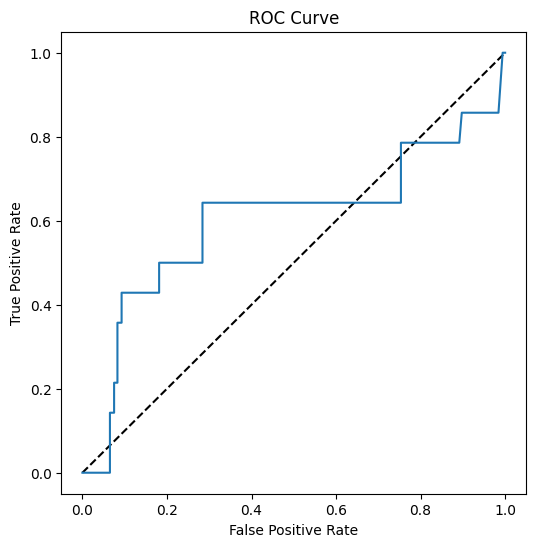

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6005212735981967


In [ ]:
# When AUC = 1, the classifier can correctly distinguish between all the Positive and the Negative class points.
# If AUC = 0, then the classifier would predict all Negatives as Positives and all Positives as Negatives.
# If AUC=0.5, the classifier couldnot distinguish between Positive and Negative class points but either predicts a random class or a constant class for all the data points.

#So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In [34]:
import joblib

# Save the model as a pickle file
filename = './pharmacovigilance_model.pkl'
joblib.dump(model, filename)

['./pharmacovigilance_model.pkl']

In [35]:
# Cosider we are using the trained model in real world data scenario. Try using different values for each parameter to predict final outcome.
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample for 1 patient
# Feature 1 :- AGE =80
# Feature 2 :-Gender = Female
# Feature 3 :-Number of days in which side effect was triggered after receiving vaccine = 23
# Feature 4 :-Dose for the vaccine used = 7mg

X_new = np.array([[80, 1, 23, 7]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted for the patient.
print('Predicted class is {}'.format(pred[0]))

New sample: [80, 1, 23, 7]
Predicted class is 0


In [ ]:
# Final output/Predicted class :- 0 (Zero means the patients would not die/expire who falls into above parameters).